# Simulation Data (Square and Cube)

In [64]:
import imageio
import os
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx
import numpy as np
import scipy
from scipy import ndimage
from scipy import misc
from sklearn import (manifold, datasets, decomposition, ensemble, discriminant_analysis, random_projection)

In [65]:
import simulations as sim
import reconstruct_video as rv
reload(sim)
reload(rv)

<module 'reconstruct_video' from 'reconstruct_video.pyc'>

# Square Simulation

### Generate Data

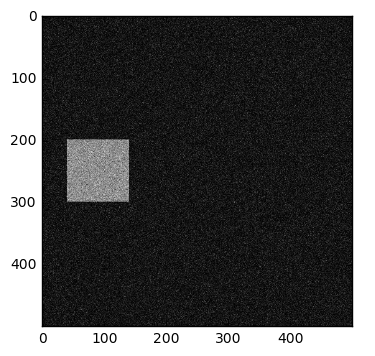

In [54]:
# generate the data: simple square rotating around a central axis
num_frame = 100
rotation_degree = 180
square_shift = 0.1
video = sim.make_rotating_square(num_frame, square_shift, rotation_degree, sigma = 50)
label = range(0,num_frame)

# show one frame for refernse
im = video[0,:,:]
plt.imshow(im, cmap='gray')
plt.show()

# format the data: vectorize the all the frames
vec_img = [f.reshape((1, -1)) for f in video]
X = np.concatenate(vec_img,axis = 0)

### Apply Isomap

In [46]:
# apply isomap
# note: we do not need to shuffle the data because isomap function is independent of row order.
n_neighbors = 2
X_iso = manifold.Isomap(n_neighbors, n_components=4).fit_transform(X)

### Reconstruct the frame order

In [47]:
# create graph and get the minimum spanning tree
G_min_tree = rv.get_minimum_spanning_tree(X_iso)

# find the longest path in the minimum spanning tree
recon = rv.get_path_from_MSP(G_min_tree)
print recon

# reorder the video frames based on the reconstruction order
video_recon = video[recon,:,:]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


### Convert Images to MP4 Videos

In [8]:
# save each frame as an image temporarily
from PIL import Image
for idx, frame in enumerate(video):
    im = Image.fromarray(frame)
    im = im.convert('RGB')
    title = "frame_" + str(idx) + ".png"
    im.save(title)

# using the frames first create a random shuffled order
writer = imageio.get_writer('random_rotating_square.mp4', fps=25)
shuffle = range(0,num_frame)
np.random.shuffle(shuffle)
for idx in shuffle:
    title = "frame_" + str(idx) + ".png"
    im = imageio.imread(title)
    writer.append_data(im[:, :, 1])
writer.close()

# create a video using the reconstructed order
writer = imageio.get_writer('ordered_rotating_square.mp4', fps=25)
for idx in recon:
    title = "frame_" + str(idx) + ".png"
    im = imageio.imread(title)
    writer.append_data(im[:, :, 1])
    os.remove(title)
writer.close()

# Cube Simulation

### Generate Data

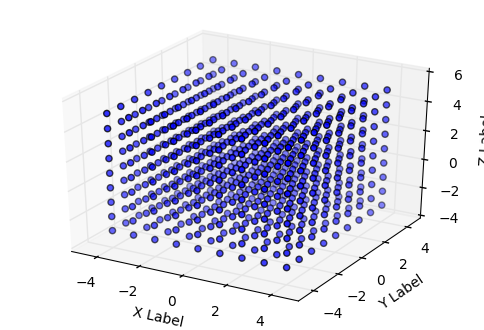

In [66]:
# generate the data: cube spiraling outwards
num_frame = 100
delta_t = 0.1
video = sim.cube_simulation(delta_t, num_frame, sigma = 0)

# show one frame for refernse
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
im = video[0,:,:]
ax.scatter(im[:,0], im[:,1], im[:,2])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

# format the data: vectorize the all the frames
vec_img = [f.reshape((1, -1)) for f in video]
X = np.concatenate(vec_img,axis = 0)


In [67]:
# apply isomap
# note: we do not need to shuffle the data because isomap function is independent of row order.
n_neighbors = 2
X_iso = manifold.Isomap(n_neighbors, n_components=4).fit_transform(X)

In [68]:
# create graph and get the minimum spanning tree
G_min_tree = rv.get_minimum_spanning_tree(X_iso)

# find the longest path in the minimum spanning tree
recon = rv.get_path_from_MSP(G_min_tree)
print recon

# reorder the video frames based on the reconstruction order
video_recon = video[recon,:,:]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
